---
title: "Data Science Job Postings 2024 (Part II): What Skills Are in Demand?"
description: >
  <span class="description">Analyzing required skills from LinkedIn job postings to uncover the most sought-after tools and technologies for data professionals.</span>
date: 2025-05-20
categories: [Data Science, EDA, Skills, Job Market]
image: 317750_linkedin_icon.png
format:
  html:
    toc: true
    toc-depth: 2
    code-copy: true
    code-overflow: wrap
    css: styles.css
---

## Introduction

In this second part of our analysis of the *Data Science Job Postings 2024* dataset, we shift our focus to the skills that employers are looking for.

We'll explore the `job_skills.csv` file that we downloaded from Kaggle [here](https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills) and:
- Analyze the most frequently mentioned skills.
- See how skills vary by job title or company.
- Visualize the results for a more catchy presentation.

If you missed the first part of this series, check it out [here](./2024-data-science-jobs-part1.html).


### Load the Data

First, let's load the libraries, the data, and set our configurations.
We will also import the previously used dataset, job_postings.csv, as it contains the job titles associated with the skills. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from collections import Counter
import altair as alt

# set configurations for the visualizations
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# load the data
df_skills = pd.read_csv("job_skills.csv")
df_postings = pd.read_csv('job_postings.csv') # used later to retrieve job titles

we will merge the two dataframes to be able to retrieve the job titles and avoid extracting it from the job links.

In [22]:
# Merge on job_link
df_merged = pd.merge(df_skills, df_postings[['job_link', 'job_title']], on='job_link', how='left')
df_merged.head(3)

,job_link,job_skills,job_title
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ...",Senior Machine Learning Engineer
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...","Principal Software Engineer, ML Accelerators"
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da...",Senior ETL Data Warehouse Specialist


### list of Functions
Those functions have been used throughout the notebook:

In [23]:
# clean and format the skills
def clean_skills(skills_series):
    """
    Clean raw skill strings: explode, strip whitespace, and lowercase.
    Returns a Series of individual cleaned skills.
    """
    skills = skills_series.dropna().str.split(',').explode()
    return skills.str.strip().str.lower()

# merged redundant skills
def apply_skill_mapping(cleaned_skills, skill_mapping):
    """
    Apply skill mapping to merge redundant skills.
    Returns a cleaned and consolidated Series with title case.
    """
    skills_mapped = cleaned_skills.replace(skill_mapping)
    return skills_mapped.str.title()

## 🧠  Most Frequently Required Skills
*Which are the skills the most frequent skills in the job postings?*

### 🧹 Initial Cleaning
We need to do some cleaning here to be able to extract the skills. The dataset contains long comma-separated strings, where each string lists multiple skills required for a job. We will go through teh following steps:

1. Split the string by commas, turning each skill string into a list of skills.
2. Because the split creates a list per row, flatten these lists so that each skill becomes its own row.
3. We remove leading and trailing spaces.
4. We convert everything to lowercase for consistency.

In [24]:
# Explode and clean individual skills
all_skills_cleaned = clean_skills(df_merged['job_skills'])

# View the most common raw cleaned skills
skill_counts_raw = all_skills_cleaned.value_counts().head(20)
print(skill_counts_raw)

job_skills
python                  4810
sql                     4610
data analysis           3293
machine learning        2684
communication           2506
data visualization      2330
aws                     1740
project management      1737
data engineering        1714
communication skills    1712
tableau                 1705
data science            1691
r                       1544
data modeling           1520
data management         1470
java                    1434
problem solving         1410
data warehousing        1408
data analytics          1402
spark                   1395
Name: count, dtype: int64


As we can see, this list of skills is not fully clean, as some skills repeat under different labels, e.g., "communication" and "communication skills".


> ❗My recommendation for you would be to go through the full list of skills and clean it up before proceeding!

### 🔁 Apply Mapping to Avoid Redundant Skills

Here I will just clean up those skills that I noticed being redundant throughout this notebook:

In [14]:
# Mapping of skill variants to canonical names
skill_mapping = {
    'communication skills': 'communication',
    'sql': 'SQL',
    'python': 'Python',
    'r': 'R',
    'power bi': 'Power BI',
    'aws': 'AWS',
    'data analysis': 'Data Analysis',
    'data analytics': 'Data Analysis',
    'data architect': 'Data Architecture',
    'data architecture': 'Data Architecture',
    'tensorflow': 'TensorFlow',
    'llms': 'LLMs',
    'nlp': 'NLP',
}

In [26]:
# Apply mapping
all_skills_mapped = apply_skill_mapping(all_skills_cleaned, skill_mapping)

# Count most common final skills
skill_counts = all_skills_mapped.value_counts().head(20)
print(skill_counts)

job_skills
Python                4810
Data Analysis         4695
Sql                   4610
Communication         4218
Machine Learning      2684
Data Visualization    2330
Aws                   1740
Project Management    1737
Data Engineering      1714
Tableau               1705
Data Science          1691
R                     1544
Data Modeling         1520
Data Management       1470
Java                  1434
Problem Solving       1410
Data Warehousing      1408
Spark                 1395
Teamwork              1227
Analytical Skills     1219
Name: count, dtype: int64


### 🔝 The 20 Most In-Demand Skills in Data Job Postings

Let's plot now the top 20 skills.

We also:

* Invert the y-axis to have the most common skill at the top.
* Add counts on the bars to show exact frequencies.

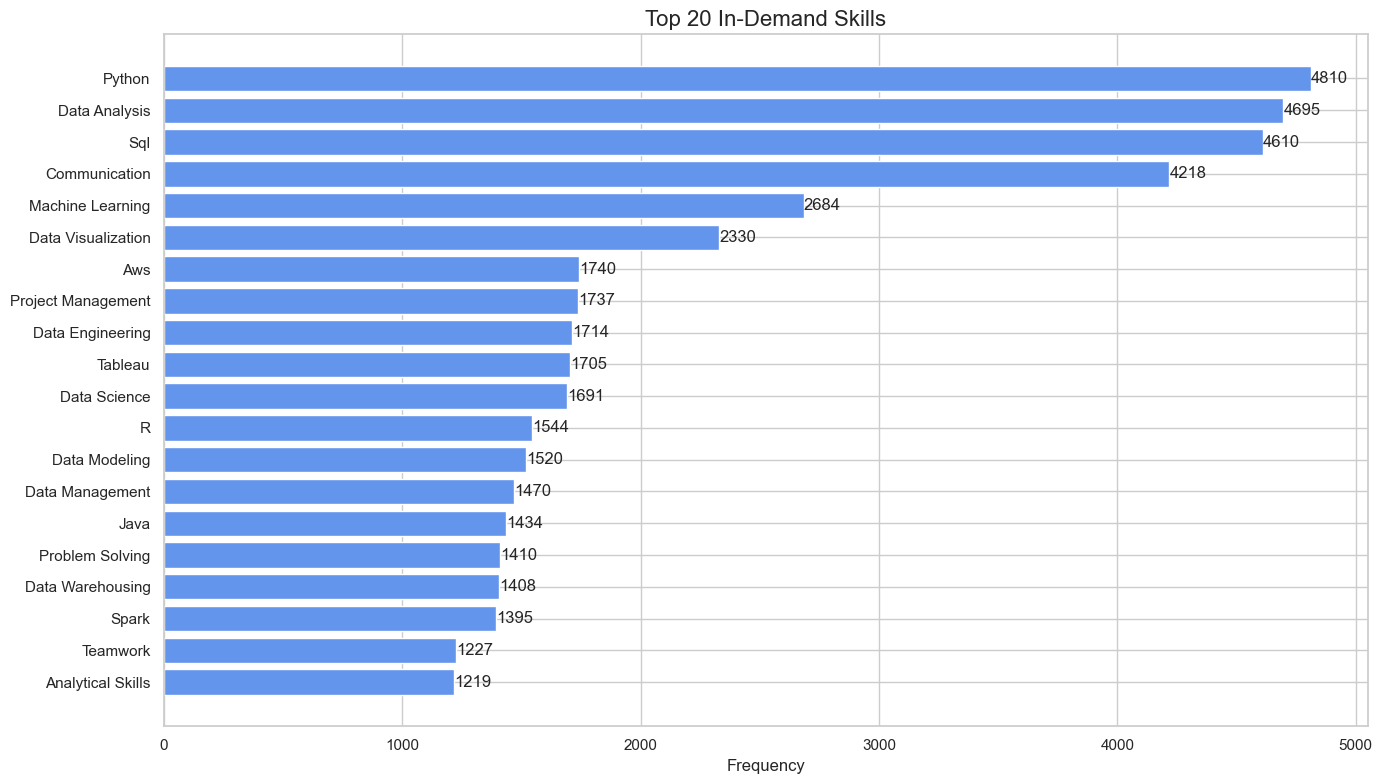

In [29]:
# Plot top 20 skills:
plt.figure(figsize=(14, 8))
bars = plt.barh(skill_counts.index, skill_counts.values, color='cornflowerblue')
plt.gca().invert_yaxis()  # Show the most frequent skill at the top

# Add frequency labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.title("Top 20 In-Demand Skills", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

## 🔝 Top Skills by Job Title

*How do skill requirements vary across different job titles?*


We will now built an interactive graphic to show for the top 10 in deman jobs the 10 most required skills.

Firstly we will build a new dataframe with the selected job titles and most required skills for them, and we will count the frequency for each skill. We will use this dataframe to create the graphic.

We will do it in the following steps:

1. Extract top 10 job titles
2. Get the top 10 skills for each job title
3. Count the frequency of each skill for each job title

In [32]:
# Get the top 10 most frequent job titles
top_titles = df_merged['job_title'].value_counts().head(10).index.tolist()

In [34]:
# Get the top 10 skills for the top 10 job titles
rows = []

for title in top_titles:
    # Get relevant skill strings for this title
    skills_series = df_merged[df_merged['job_title'] == title]['job_skills']
    
    # Clean raw skills
    cleaned_skills = clean_skills(skills_series)

    # Apply skill mapping to avoid redundancy
    mapped_skills = apply_skill_mapping(cleaned_skills, skill_mapping)
    
    # Count the top 10 skills
    skill_counts = mapped_skills.value_counts().head(10)

    # Step 4: Append to list
    for skill, count in skill_counts.items():
        rows.append({
            'job_title': title,
            'job_skill': skill,
            'count': count
        })

In [36]:
# Convert to DataFrame
top_skills_filtered = pd.DataFrame(rows)
top_skills_filtered = top_skills_filtered.sort_values(['job_title', 'count'], ascending=[True, False])

top_skills_filtered.head(3)

,job_title,job_skill,count
40,Data Analyst,Data Analysis,126
41,Data Analyst,Sql,89
42,Data Analyst,Data Visualization,73


In [38]:
import altair as alt

# Create a dropdown selection for job title
title_dropdown = alt.binding_select(options=top_skills_filtered['job_title'].unique().tolist(), name='Job Title: ')
selection = alt.selection_point(fields=['job_title'], bind=title_dropdown)

# Build the chart
chart = (
    alt.Chart(top_skills_filtered)
    .transform_filter(selection)
    .mark_bar(color='cornflowerblue')
    .encode(
        x=alt.X('count:Q', title='Count'),
        y=alt.Y('job_skill:N', sort='-x', title='Skill'),
        tooltip=['job_skill', 'count']
    )
    .add_params(selection)
    .properties(
        title='Top 10 Skills by Job Title',
        width=600,
        height=400
    )
)

chart


alt.Chart(...)

## Conclusion

This analysis gives us a clearer picture of the technical expectations for data science professionals in 2024. Python, Data Analysis, SQL, and machine learning are core skills core skills, but don't forget that communication, teamwork, problem solving, and other soft skills are also essential!

Also, please keep in mind that those results rely on a dataset that has been generated by scraping jobs from LinkedIn, and that it may be biased toward english speaking jobs and the english speaking market. See the Part I of this analysis [here](./2024-data-science-jobs-part1.html) to have an overview of the top locations and companies considered in this project. 

In the next post, we’ll analyze job summaries using NLP techniques to uncover trends in job descriptions.
